In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf

##### STEP 1 - DOWNLOADING HISTORICAL DATA

In [2]:
Stocks = yf.download('FSMEX CGTYX GII VGENX FSDAX IVV WIEFX VDIGX GSPTX PRISX XOM PG DELL TSLA EQIX',start='2017-12-01', end='2022-11-30')

[*********************100%***********************]  15 of 15 completed


In [3]:
Stocks.tail()

Adj Close                                                      \
                CGTYX       DELL        EQIX  FSDAX      FSMEX        GII   
Date                                                                        
2022-11-22  55.000000  43.849998  656.070007  15.17  60.270000  53.770000   
2022-11-23  55.570000  44.610001  671.770020  15.21  60.790001  54.230000   
2022-11-25  55.200001  44.630001  674.659973  15.32  61.209999  54.509998   
2022-11-28  54.139999  43.580002  662.609985  15.02  60.330002  53.820000   
2022-11-29  53.830002  43.520000  670.960022  15.08  60.139999  53.669998   

                                                          ...  Volume        \
                GSPTX         IVV          PG      PRISX  ...     GII GSPTX   
Date                                                      ...                 
2022-11-22  27.600000  401.720001  145.619995  33.540001  ...  154600     0   
2022-11-23  27.799999  404.119995  146.449997  33.599998  ...   46400     0   
2022-11-25  27.770000  404.089996  146.720001  33.759998  ...   10000     0   
2022-11-28  27.340000  397.690002  146.600006  33.169998  ...   10400     0   
2022-11-29  27.309999  397.010010  145.479996  33.410000  ...   17100     0   

                                                                           
                IVV       PG PRISX       TSLA VDIGX VGENX WIEFX       XOM  
Date                                                                       
2022-11-22  3314200  5372900     0   78452300     0     0     0  17719100  
2022-11-23  2267600  4296000     0  109536700     0     0     0  11546700  
2022-11-25  1202500  2411100     0   50672700     0     0     0   7136000  
2022-11-28  2506500  6628200     0   92905200     0     0     0  23015500  
2022-11-29  4447800  5634200     0   83357100     0     0     0  14453200  

[5 rows x 90 columns]

In [4]:
Stocks = Stocks['Adj Close']
print (Stocks)

                CGTYX       DELL        EQIX      FSDAX      FSMEX        GII  \
Date                                                                            
2017-12-01  26.233063  21.901051  428.154144  11.786240  34.489208  45.184132   
2017-12-04  25.629448  20.512379  403.623566  11.806683  33.583885  45.167145   
2017-12-05  25.647556  20.397339  406.644287  11.714338  33.605618  44.869991   
2017-12-06  25.744137  20.558939  410.887878  11.786240  33.692524  44.920940   
2017-12-07  25.991617  20.786278  415.934448  11.866600  33.728733  44.937912   
...               ...        ...         ...        ...        ...        ...   
2022-11-22  55.000000  43.849998  656.070007  15.170000  60.270000  53.770000   
2022-11-23  55.570000  44.610001  671.770020  15.210000  60.790001  54.230000   
2022-11-25  55.200001  44.630001  674.659973  15.320000  61.209999  54.509998   
2022-11-28  54.139999  43.580002  662.609985  15.020000  60.330002  53.820000   
2022-11-29  53.830002  43.52

##### Step 2 - Plot the price of securities against time. Please note price cannot be used to analyse the model since it is not normally distributed and hence we will caslculate annualised returns for our analysis.

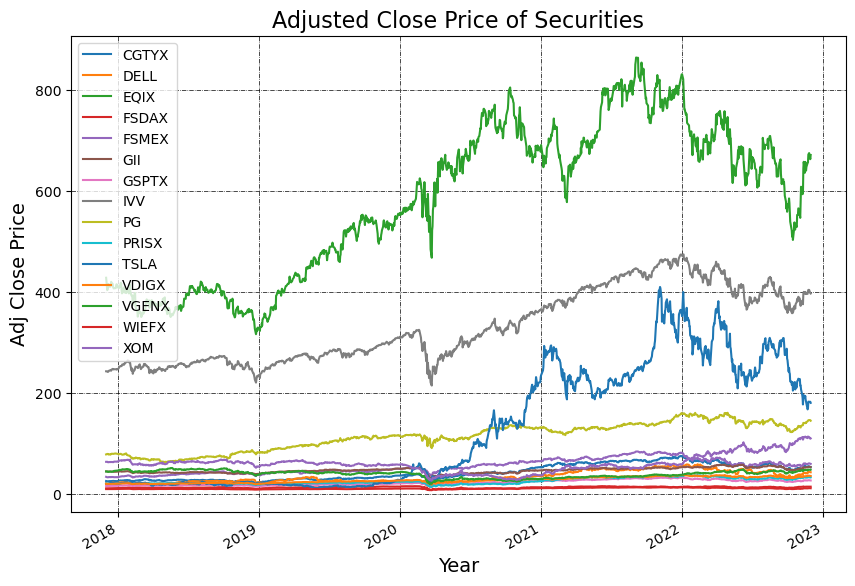

In [6]:
Stocks.plot(figsize=(10, 7))
plt.title("Adjusted Close Price of Securities" % Stocks, fontsize=16)
plt.ylabel('Adj Close Price', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

##### Step 3 - Calculate the Annualized return of the stocks

In [10]:
Ret= Stocks.pct_change().apply(lambda x: np.log(1+x))
Ann_Ret = Ret.mean()*252
print (Ann_Ret)

CGTYX    0.144220
DELL     0.137775
EQIX     0.090131
FSDAX    0.049444
FSMEX    0.111560
GII      0.034531
GSPTX    0.102087
IVV      0.098327
PG       0.122864
PRISX    0.092042
TSLA     0.437447
VDIGX    0.115808
VGENX    0.014450
WIEFX    0.029533
XOM      0.109109
dtype: float64


<AxesSubplot:title={'center':'Mutual Funds daily returns'}, xlabel='Date'>

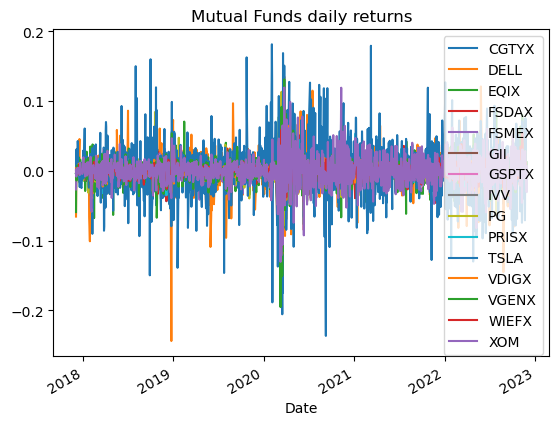

In [13]:
Ret.plot(title='Mutual Funds daily returns')

##### Step 4 - Calculate the Annualised Standard Deviations of the securities. Also observe the Daily price movement of each, which will further explain the volatility of the security.

In [12]:
Ann_Risk = Ret.std()*(252)**(0.5)
print(Ann_Risk)

CGTYX    0.296584
DELL     0.393356
EQIX     0.302777
FSDAX    0.266631
FSMEX    0.238970
GII      0.209485
GSPTX    0.225249
IVV      0.218357
PG       0.218139
PRISX    0.256601
TSLA     0.646947
VDIGX    0.191152
VGENX    0.281596
WIEFX    0.166380
XOM      0.337671
dtype: float64


##### Step 5 - We have to calculate variance of the portfolio using Markowitz Model. First we take equal weightage of each portfolio and note the risk figure.

In [20]:
Ret_Corr = Ret.corr()
Ret_Covar = Ret.cov()
#print(Ret_Covar)
#print(Ret_Corr)
cov_matrix = Stocks.pct_change().apply(lambda x: np.log(1+x)).cov()
#cov_matrix
corr_matrix = Stocks.pct_change().apply(lambda x: np.log(1+x)).corr()
#corr_matrix

In [21]:
w = {'CGTYX':0.067,'FSDAX':0.067,'FSMEX':0.067,'GII':0.067,'GSPTX':0.067,'IVV':0.067,'PRISX':0.067,'VDIGX':0.067,'VGENX':0.067,'WIEFX':0.067,'XOM':0.067,'PG':0.067,'DELL':0.067,'TSLA':0.067,'EQIX':0.067}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
Ann_port_std = (port_var*252)**(0.5)
print (port_var)
print (port_var*252)

0.00018720492570662386
0.04717564127806921


In [22]:
Ann_port_std

0.21719954253651

##### Step 6 - Calculate individual security and portfolio expected returns for equal weightage of each security.

In [23]:
ind_er = Stocks.resample('Y').last().pct_change().mean()
ind_er

CGTYX    0.208077
DELL     0.173915
EQIX     0.147472
FSDAX    0.054237
FSMEX    0.147436
GII      0.045494
GSPTX    0.121721
IVV      0.116238
PG       0.138175
PRISX    0.112001
TSLA     1.554233
VDIGX    0.126945
VGENX    0.037363
WIEFX    0.035970
XOM      0.202642
dtype: float64

In [24]:
w = [0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067,0.067]
port_er = (w*ind_er).sum()
port_er

0.21586852251215646

In [26]:
ann_sd = Stocks.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(252))
#ann_sd


In [27]:
assets = pd.concat([ind_er, ann_sd], axis=1)
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
CGTYX,0.208077,0.296584
DELL,0.173915,0.393356
EQIX,0.147472,0.302777
FSDAX,0.054237,0.266631
FSMEX,0.147436,0.238970
GII,0.045494,0.209485
GSPTX,0.121721,0.225249
IVV,0.116238,0.218357
PG,0.138175,0.218139
PRISX,0.112001,0.256601


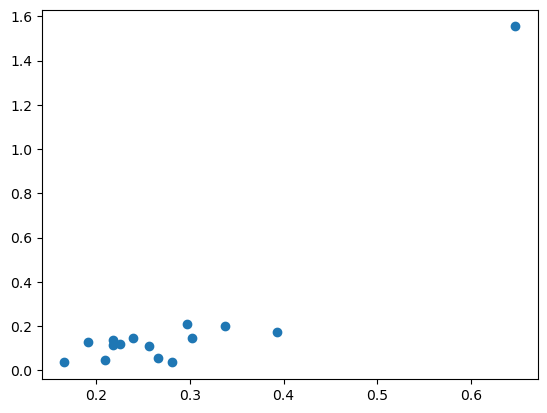

In [28]:
import matplotlib.pyplot as plt
x = ann_sd # RISK
y = ind_er # Return
plt.scatter(x, y)
plt.show()

##### Step 7 - We program the machine to identify 10000 portfolios possible.

In [30]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights
num_assets = len(Stocks.columns)
num_portfolios = 10000

In [31]:
for portfolio in range(num_portfolios):
 weights = np.random.random(num_assets)
 weights = weights/np.sum(weights)
 p_weights.append(weights)
 returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its
 # weights
 p_ret.append(returns)
 var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum() # Portfolio Variance
 sd = np.sqrt(var) #Daily standard deviation
 ann_sd = sd*np.sqrt(252) #Annual standard deviation = volatility
 p_vol.append(ann_sd)


In [33]:
data = {'Returns':p_ret, 'Volatility':p_vol}
for counter, symbol in enumerate(Stocks.columns.tolist()):
 #print(counter, symbol)
 data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios = pd.DataFrame(data)
#portfolios.head()

##### Efficient frontier

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

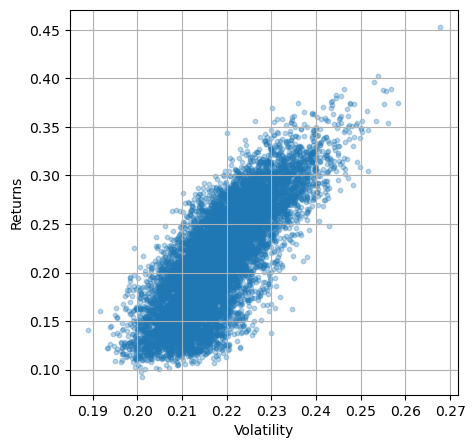

In [34]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[5,5])

##### Step - 8 Identifying portfolio with minimum Volatility / risk

In [39]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
min_vol_port

Returns         0.140976
Volatility      0.188953
CGTYX weight    0.006657
DELL weight     0.019537
EQIX weight     0.076544
FSDAX weight    0.003866
FSMEX weight    0.087071
GII weight      0.130043
GSPTX weight    0.071991
IVV weight      0.000614
PG weight       0.155673
PRISX weight    0.055660
TSLA weight     0.018642
VDIGX weight    0.153218
VGENX weight    0.027789
WIEFX weight    0.114882
XOM weight      0.077814
Name: 3463, dtype: float64

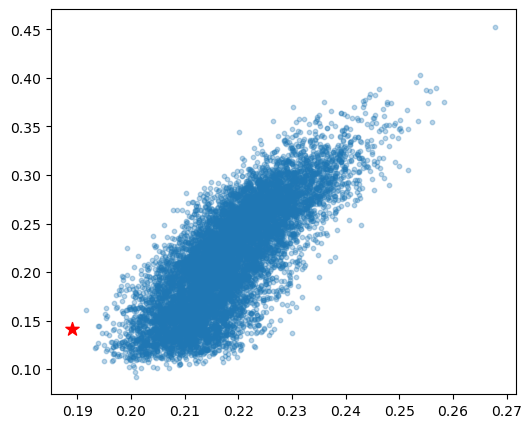

In [36]:
plt.subplots(figsize=[6,5])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=100)

##### Step 9 - Identify the Optimal portfolio with maximized returns

In [41]:
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
#optimal_risky_port

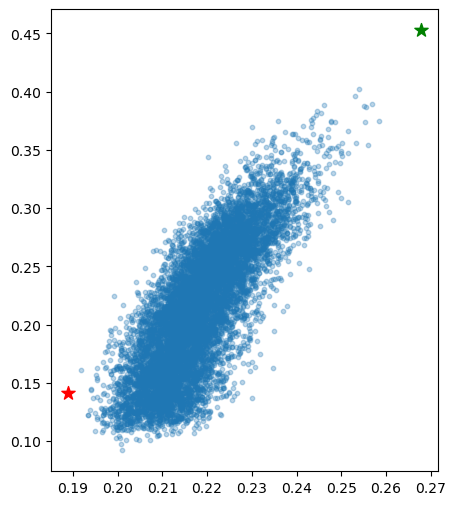

In [40]:
# Plotting optimal portfolio
plt.subplots(figsize=(5, 6))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=100)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=100)